# Scrapping data science books informations from Amazon

In this notebook, we will scrap some useful information about data science books in order to analyze them and look for the most rated books, using beautiful soup

In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import time
import selenium
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.keys import Keys

In [61]:
path = r"C:\Users\Rihab\Downloads\chromedriver-win64\chromedriver.exe"
driver = webdriver.Chrome(service = Service(executable_path=path))

In [62]:
# Enter to the site
driver.get(r'https://www.amazon.com')

In [63]:
keyword="Data science books"
# type the keyword in searchbox
search_box=driver.find_element(By.ID, 'twotabsearchtextbox').send_keys(keyword)
#Search button
driver.find_element(By.ID, 'nav-search-submit-button').click()
# wait for the page to download
driver.implicitly_wait(5)

In [64]:
#Get all the books links
#Navigate 3 pages
links=[]
print('Links are being collected now.')
try:
    for page in range(2,4):
        time.sleep(2)
        books_block=driver.find_element(By.CSS_SELECTOR, "#search > div.s-desktop-width-max.s-desktop-content.s-wide-grid-style-t1.s-opposite-dir.s-wide-grid-style.sg-row > div.sg-col-20-of-24.s-matching-dir.sg-col-16-of-20.sg-col.sg-col-8-of-12.sg-col-12-of-16 > div > span.rush-component.s-latency-cf-section")
        books_list=books_block.find_elements(By.XPATH,'//div[contains(@class, "s-result-item s-asin")]')
        for book in books_list:
            all_links=book.find_elements(By.XPATH, './/a[@class="a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal"]')
            for a in all_links:
                if str(a.get_attribute('href')).startswith("https://www.amazon.com/") and a.get_attribute('href') not in links: 
                    links.append(a.get_attribute('href'))
                else:
                    pass
            # scroll down for each book element
            driver.execute_script("arguments[0].scrollIntoView();", book)
        print(f'Collecting the links in the page: {page-1}')
        # go to next page:
        driver.find_element(By.XPATH, f"//a[@aria-label='Go to page {page}']").click()
        time.sleep(3)
except:
    pass
print('Found ' + str(len(links)) + ' books link')
        

Links are being collected now.
Found 118 books link


In [86]:
# Create empty lists to store information
Titles=[]
Authors=[]
Prices=[]
avg_views=[]
n_reviews=[]
Stars=[]
Star5=[]
Star4=[]
Star3=[]
Star2=[]
Star1=[]

In [87]:
for i in range(len(links)):
    try:
        driver.get(links[i])
        i=i+1
        time.sleep(2)
    except:
        pass
    
    try:
        Titles.append(driver.find_element(By.ID, 'productTitle').text)
        Authors.append(driver.find_element(By.XPATH,'.//span[@class="author notFaded"]/a').text)
        Prices.append(driver.find_element(By.XPATH, './/span[contains(@class, "a-color-price")]').text)
        avg_views.append(driver.find_element(By.CSS_SELECTOR, '#acrPopover > span.a-declarative > a > span').text)
        n_reviews.append(driver.find_element(By.ID, 'acrCustomerReviewText').text)
        Stars.append(driver.find_elements(By.XPATH, '//td[@class="a-text-right a-nowrap"]'))
        Star5.append(Stars[i-1][0].text)
        Star4.append(Stars[i-1][1].text)
        Star3.append(Stars[i-1][2].text)
        Star2.append(Stars[i-1][3].text)
        Star1.append(Stars[i-1][4].text)
        print(f"scrapping book number {i} Done")
    except:
        pass
    time.sleep(2)

scrapping book number 1 Done
scrapping book number 2 Done
scrapping book number 3 Done
scrapping book number 4 Done
scrapping book number 5 Done
scrapping book number 6 Done
scrapping book number 7 Done
scrapping book number 8 Done
scrapping book number 9 Done
scrapping book number 10 Done
scrapping book number 11 Done
scrapping book number 12 Done
scrapping book number 13 Done
scrapping book number 14 Done
scrapping book number 15 Done
scrapping book number 16 Done
scrapping book number 17 Done
scrapping book number 18 Done
scrapping book number 19 Done
scrapping book number 20 Done
scrapping book number 21 Done
scrapping book number 22 Done
scrapping book number 23 Done
scrapping book number 24 Done
scrapping book number 25 Done
scrapping book number 26 Done
scrapping book number 27 Done
scrapping book number 28 Done
scrapping book number 29 Done
scrapping book number 30 Done
scrapping book number 31 Done
scrapping book number 32 Done
scrapping book number 33 Done
scrapping book numb

In [105]:
import pandas as pd
df = pd.DataFrame(list(zip(Titles,Authors,
                    Prices,avg_views,
                    n_reviews,Star5,Star4,Star3,Star2,Star1)),
                    columns =['Title', 'Author',
                           'Price','avg_reviews',
                           'n_reviewers','Star5','Star4','Star3','Star2','Star1'])



In [90]:
df.to_csv('books_DS.csv', index=False)

In [106]:
df

,Title,Author,Price,avg_reviews,n_reviewers,Star5,Star4,Star3,Star2,Star1
0,Ace the Data Science Interview: 201 Real Inter...,Nick Singh,$37.11,4.5,882 ratings,76%,12%,5%,2%,4%
1,Storytelling with Data: A Data Visualization G...,Cole Nussbaumer Knaflic,,4.6,"4,476 ratings",75%,17%,6%,1%,2%
2,Murach's R for Data Analysis,Scott Mccoy,$51.99,5.0,6 ratings,100%,0%,0%,0%,0%
3,The Kaggle Book: Data analysis and machine lea...,Konrad Banachewicz,$44.53,4.4,129 ratings,70%,14%,6%,6%,5%
4,"Becoming a Data Head: How to Think, Speak, and...",Alex J. Gutman,$24.49,4.6,291 ratings,74%,18%,5%,3%,1%
5,Essential Math for Data Science: Take Control ...,Thomas Nield,$29.45,4.5,194 ratings,76%,9%,9%,1%,4%
6,Data Science (The MIT Press Essential Knowledg...,John D. Kelleher,$9.69,4.4,528 ratings,62%,23%,9%,4%,2%
7,Practical Statistics for Data Scientists: 50+ ...,Peter Bruce,,4.6,751 ratings,77%,13%,6%,2%,3%
8,Ace the Data Science Interview: 201 Real Inter...,Nick Singh,$37.11,4.5,882 ratings,76%,12%,5%,2%,4%
9,Fundamentals of Data Science: Take the first S...,Samuel Burns,$7.99,4.5,8 ratings,66%,16%,17%,0%,0%


# Analyzing data science books dataset

In [3]:
df=pd.read_csv('books_DS.csv')

In [4]:
df['n_reviewers']=df['n_reviewers'].str.split().str[0]

In [5]:
df['Price']=df['Price'].str.replace('$','')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        49 non-null     object 
 1   Author       49 non-null     object 
 2   Price        31 non-null     object 
 3   avg_reviews  49 non-null     float64
 4   n_reviewers  49 non-null     object 
 5   Star5        49 non-null     object 
 6   Star4        49 non-null     object 
 7   Star3        49 non-null     object 
 8   Star2        49 non-null     object 
 9   Star1        49 non-null     object 
dtypes: float64(1), object(9)
memory usage: 4.0+ KB


In [7]:
#changing data types
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df['n_reviewers']=pd.to_numeric(df['n_reviewers'], errors='coerce')

In [8]:
df['avg_reviews']=pd.to_numeric(df['avg_reviews'], errors='coerce')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        49 non-null     object 
 1   Author       49 non-null     object 
 2   Price        31 non-null     float64
 3   avg_reviews  49 non-null     float64
 4   n_reviewers  44 non-null     float64
 5   Star5        49 non-null     object 
 6   Star4        49 non-null     object 
 7   Star3        49 non-null     object 
 8   Star2        49 non-null     object 
 9   Star1        49 non-null     object 
dtypes: float64(3), object(7)
memory usage: 4.0+ KB


In [10]:
df

,Title,Author,Price,avg_reviews,n_reviewers,Star5,Star4,Star3,Star2,Star1
0,Ace the Data Science Interview: 201 Real Inter...,Nick Singh,37.11,4.5,882.0,76%,12%,5%,2%,4%
1,Storytelling with Data: A Data Visualization G...,Cole Nussbaumer Knaflic,NaN,4.6,NaN,75%,17%,6%,1%,2%
2,Murach's R for Data Analysis,Scott Mccoy,51.99,5.0,6.0,100%,0%,0%,0%,0%
3,The Kaggle Book: Data analysis and machine lea...,Konrad Banachewicz,44.53,4.4,129.0,70%,14%,6%,6%,5%
4,"Becoming a Data Head: How to Think, Speak, and...",Alex J. Gutman,24.49,4.6,291.0,74%,18%,5%,3%,1%
5,Essential Math for Data Science: Take Control ...,Thomas Nield,29.45,4.5,194.0,76%,9%,9%,1%,4%
6,Data Science (The MIT Press Essential Knowledg...,John D. Kelleher,9.69,4.4,528.0,62%,23%,9%,4%,2%
7,Practical Statistics for Data Scientists: 50+ ...,Peter Bruce,NaN,4.6,751.0,77%,13%,6%,2%,3%
8,Ace the Data Science Interview: 201 Real Inter...,Nick Singh,37.11,4.5,882.0,76%,12%,5%,2%,4%
9,Fundamentals of Data Science: Take the first S...,Samuel Burns,7.99,4.5,8.0,66%,16%,17%,0%,0%


 #### Price vs. reviews

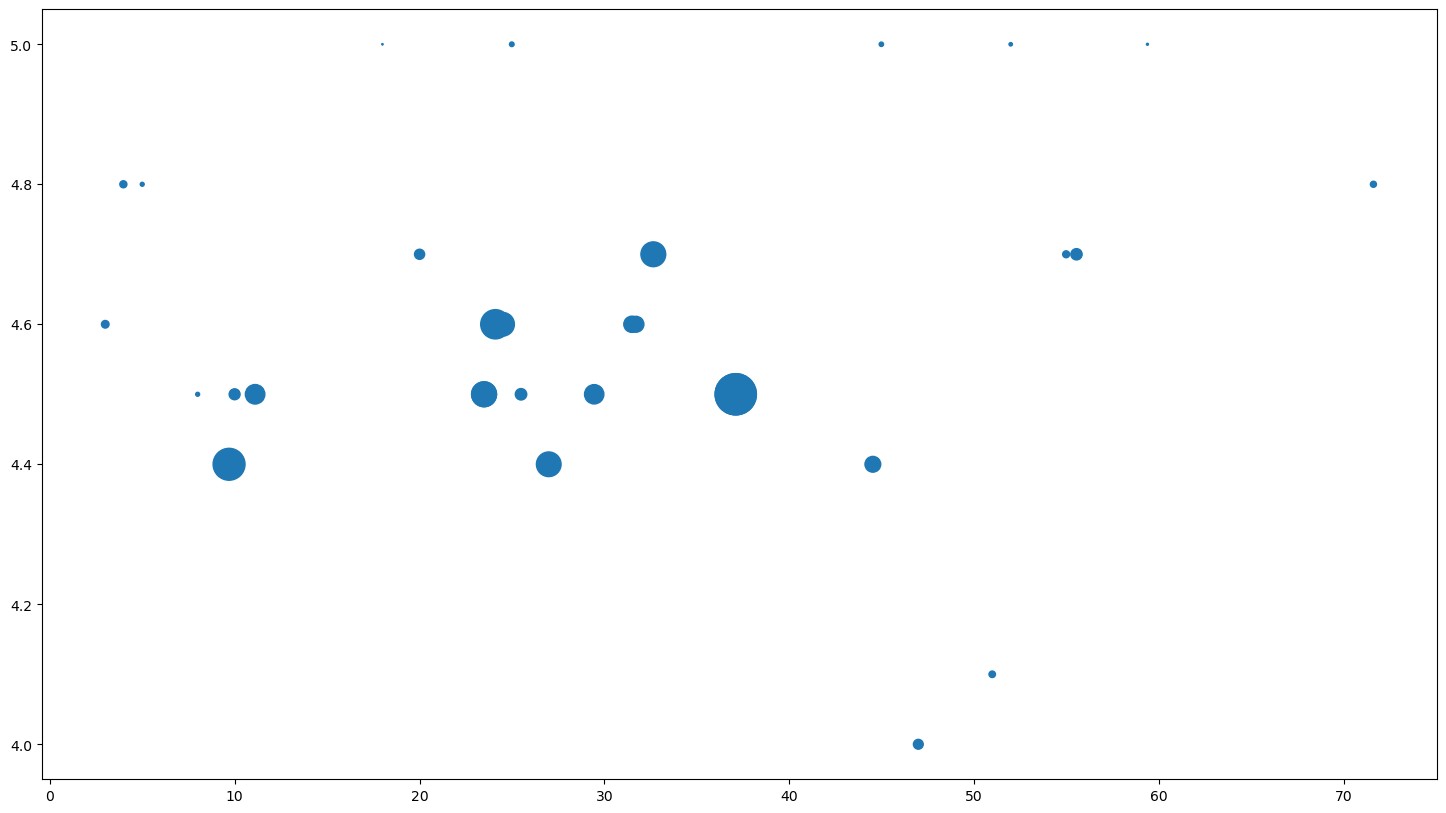

In [11]:
plt.figure(figsize=(18,10))
plt.scatter(df['Price'],df['avg_reviews'],s=df['n_reviewers'])
plt.show()

### Best Python books

In [13]:
# Select books based on title containing "Python"
python_books = df[df['Title'].str.contains("Python")]

# Python books with most reviews and highest average rating
best_python_books = python_books.nlargest(7, ['n_reviewers','avg_reviews'])
best_python_books

,Title,Author,Price,avg_reviews,n_reviewers,Star5,Star4,Star3,Star2,Star1
7,Practical Statistics for Data Scientists: 50+ ...,Peter Bruce,NaN,4.6,751.0,77%,13%,6%,2%,3%
14,Data Science from Scratch: First Principles wi...,Joel Grus,NaN,4.4,683.0,65%,18%,9%,4%,4%
10,Python Programming and SQL: 5 books in 1 - The...,Mark Reed,32.65,4.7,319.0,87%,4%,3%,3%,3%
26,Python for Data Science For Dummies (For Dummi...,John Paul Mueller,NaN,4.4,214.0,63%,22%,9%,3%,3%
32,Python for Data Analysis: Data Wrangling with ...,Wes McKinney,NaN,4.5,191.0,72%,15%,7%,2%,4%
45,Practical Linear Algebra for Data Science: Fro...,Mike Cohen,NaN,4.5,40.0,69%,18%,4%,9%,0%
30,Python for Data Science: A Hands-On Introduction,Yuli Vasiliev,NaN,4.5,27.0,79%,8%,0%,5%,7%


### Best Machine learning books

In [14]:
# Select books based on title containing "Machine Learning"
ml_books = df[df['Title'].str.contains("Machine Learning")]

# ML books with most reviews and highest average rating
best_ml_books = ml_books.nlargest(7, ['n_reviewers','avg_reviews'])
best_ml_books

,Title,Author,Price,avg_reviews,n_reviewers,Star5,Star4,Star3,Star2,Star1
4,"Becoming a Data Head: How to Think, Speak, and...",Alex J. Gutman,24.49,4.6,291.0,74%,18%,5%,3%,1%
17,"Data Science on AWS: Implementing End-to-End, ...",Chris Fregly,11.10,4.5,197.0,70%,15%,7%,5%,3%
21,Machine Learning System Design Interview,Ali Aminian,NaN,4.3,78.0,72%,6%,9%,5%,8%
27,Data-Driven Science and Engineering: Machine L...,Steven L. Brunton,55.55,4.7,66.0,87%,4%,7%,0%,2%
38,Data Science for Beginners: An Introduction to...,Brian Murray,2.99,4.6,30.0,82%,8%,0%,5%,5%
41,Machine Learning Explained The Simple Way: A B...,Santos Ozoemena,3.97,4.8,26.0,94%,0%,0%,0%,6%


#### WordCloud

we can devide books to cluster, and figure out what are the most relevant words in each book titles for each cluster

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1,2))

X = vectorizer.fit_transform(df["Title"])

In [17]:
#using KMeans 
from sklearn.cluster import KMeans
dis = []

K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k, max_iter=600, n_init=10)
    km.fit(X)
    dis.append(km.inertia_)

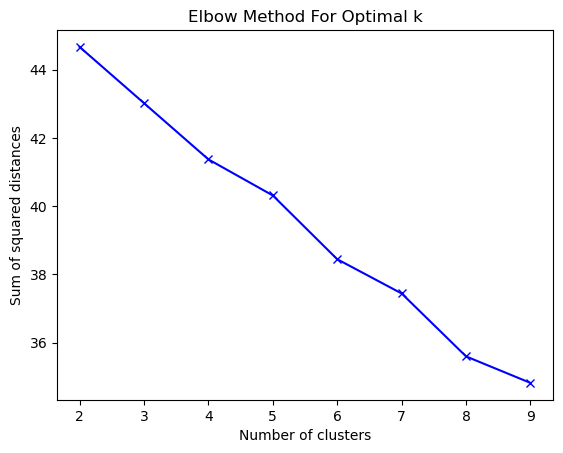

In [18]:
#find best value of k using elbow method
plt.plot(K, dis, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [19]:
#k=7
k = 6
model = KMeans(n_clusters=k, init='k-means++', max_iter=600, n_init=10)
model.fit(X)

# Get prediction/ labels
labels = model.labels_
book_cl = pd.DataFrame(list(zip(df["Title"],labels)),columns=['Title','cluster'])
print(book_cl.sort_values(by=['cluster']))

                                                Title  cluster
48  A Programmer's Guide to Computer Science: A vi...        0
25  Data Science For Dummies (For Dummies (Compute...        0
26  Python for Data Science For Dummies (For Dummi...        0
10  Python Programming and SQL: 5 books in 1 - The...        0
16  How Data Happened: A History from the Age of R...        1
23  Fundamentals of Data Engineering: Plan and Bui...        1
12  Confident Data Science: Discover the Essential...        1
29  The Data Science Handbook: Advice and Insights...        1
22  Data Science for Business: What You Need to Kn...        1
33                            The Art of Data Science        1
36  The ABCs of Data Science: By Real Data Scienti...        1
6   Data Science (The MIT Press Essential Knowledg...        1
5   Essential Math for Data Science: Take Control ...        1
37                     Build a Career in Data Science        1
39  Naked Statistics: Stripping the Dread from the...  

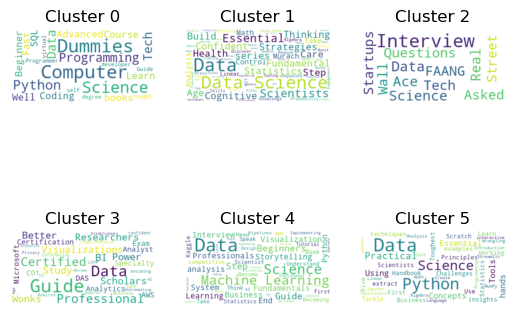

In [20]:
from wordcloud import WordCloud
for k in range(k):
    text = book_cl[book_cl.cluster == k]['Title'].str.cat(sep=' ')
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)

   # Create subplot
    plt.subplot(2, 3, k+1).set_title("Cluster " + str(k)) 
    plt.plot()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
plt.show()